In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.layers import Dropout

Create model detect ppg

In [ ]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()

    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(100,)),
        Dropout(0.001),
        layers.Dense(32, activation="relu6", kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(4, activation="relu6", kernel_regularizer=regularizers.l2(0.001))
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(32, activation="relu6", kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.001),
        layers.Dense(100, kernel_regularizer=regularizers.l2(0.001))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  def get_config(self):
    config = super(Autoencoder, self).get_config()
    return config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

autoencoder = Autoencoder()

Load data

In [ ]:
PPG_PATH = "/content/drive/MyDrive/graduation_thesis/ppg-dataset/ppg_set.npy"

In [ ]:
ppg_set = np.load(PPG_PATH)
print(ppg_set.shape)

(5071, 100)


In [ ]:
np.random.shuffle(ppg_set)

In [ ]:
train_set = ppg_set
test_set = ppg_set[4500:5000]

Compile & Fit

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

history_autoencoder = autoencoder.fit(
    train_set,
    train_set,
    epochs=500,
    batch_size=32,
    validation_data=(test_set, test_set),
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/500
159/159 [==============================] - 2s 6ms/step - loss: 0.7389 - mae: 0.6347 - val_loss: 0.4758 - val_mae: 0.4798
Epoch 2/500
159/159 [==============================] - 1s 4ms/step - loss: 0.4145 - mae: 0.4419 - val_loss: 0.3558 - val_mae: 0.4051
Epoch 3/500
159/159 [==============================] - 1s 3ms/step - loss: 0.3220 - mae: 0.3835 - val_loss: 0.2966 - val_mae: 0.3664
Epoch 4/500
159/159 [==============================] - 1s 4ms/step - loss: 0.2843 - mae: 0.3586 - val_loss: 0.2747 - val_mae: 0.3507
Epoch 5/500
159/159 [==============================] - 1s 4ms/step - loss: 0.2664 - mae: 0.3454 - val_loss: 0.2609 - val_mae: 0.3393
Epoch 6/500
159/159 [==============================] - 1s 4ms/step - loss: 0.2550 - mae: 0.3360 - val_loss: 0.2533 - val_mae: 0.3342
Epoch 7/500
159/159 [==============================] - 1s 4ms/step - loss: 0.2471 - mae: 0.3294 - val_loss: 0.2457 - val_mae: 0.3271
Epoch 8/500
159/159 [==============================] - 1s 6ms/step - 

Evalute model

In [ ]:
autoencoder.summary()

Model: "autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 4)                 3364      
                                                                 
 sequential_6 (Sequential)   (None, 100)               3460      
                                                                 
Total params: 6824 (26.66 KB)
Trainable params: 6824 (26.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.encoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                3232      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3364 (13.14 KB)
Trainable params: 3364 (13.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                160       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 100)               3300      
                                                                 
Total params: 3460 (13.52 KB)
Trainable params: 3460 (13.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Learning Curve - Loss / Accuracy

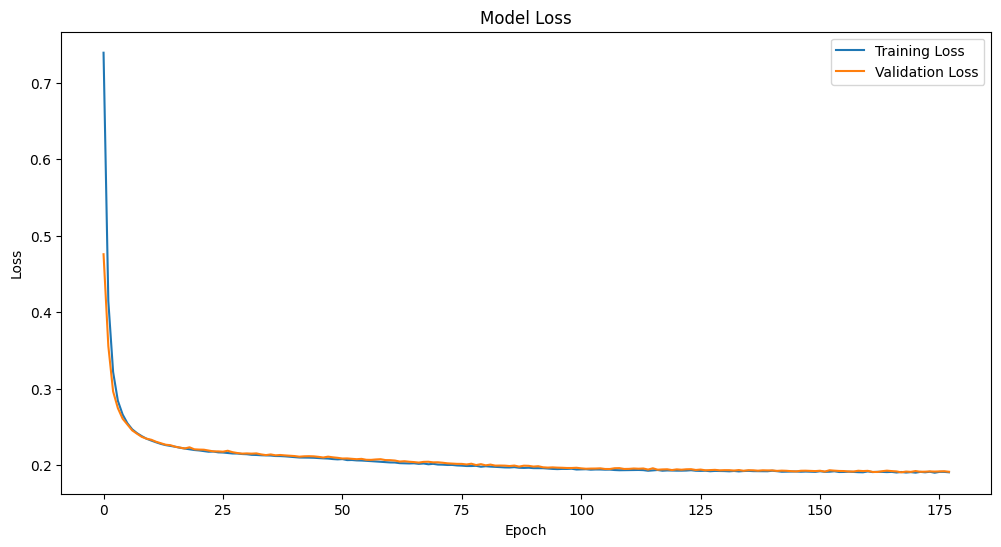

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_autoencoder.history['loss'], label='Training Loss')
plt.plot(history_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

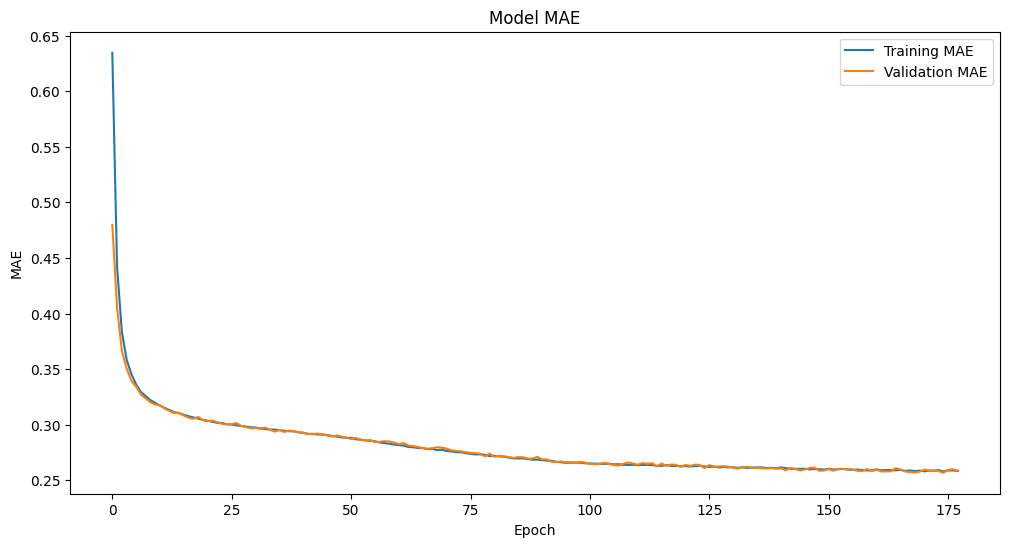

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_autoencoder.history['mae'], label='Training MAE')
plt.plot(history_autoencoder.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

Test model detect ppg

1/1 [==============================] - 0s 148ms/step


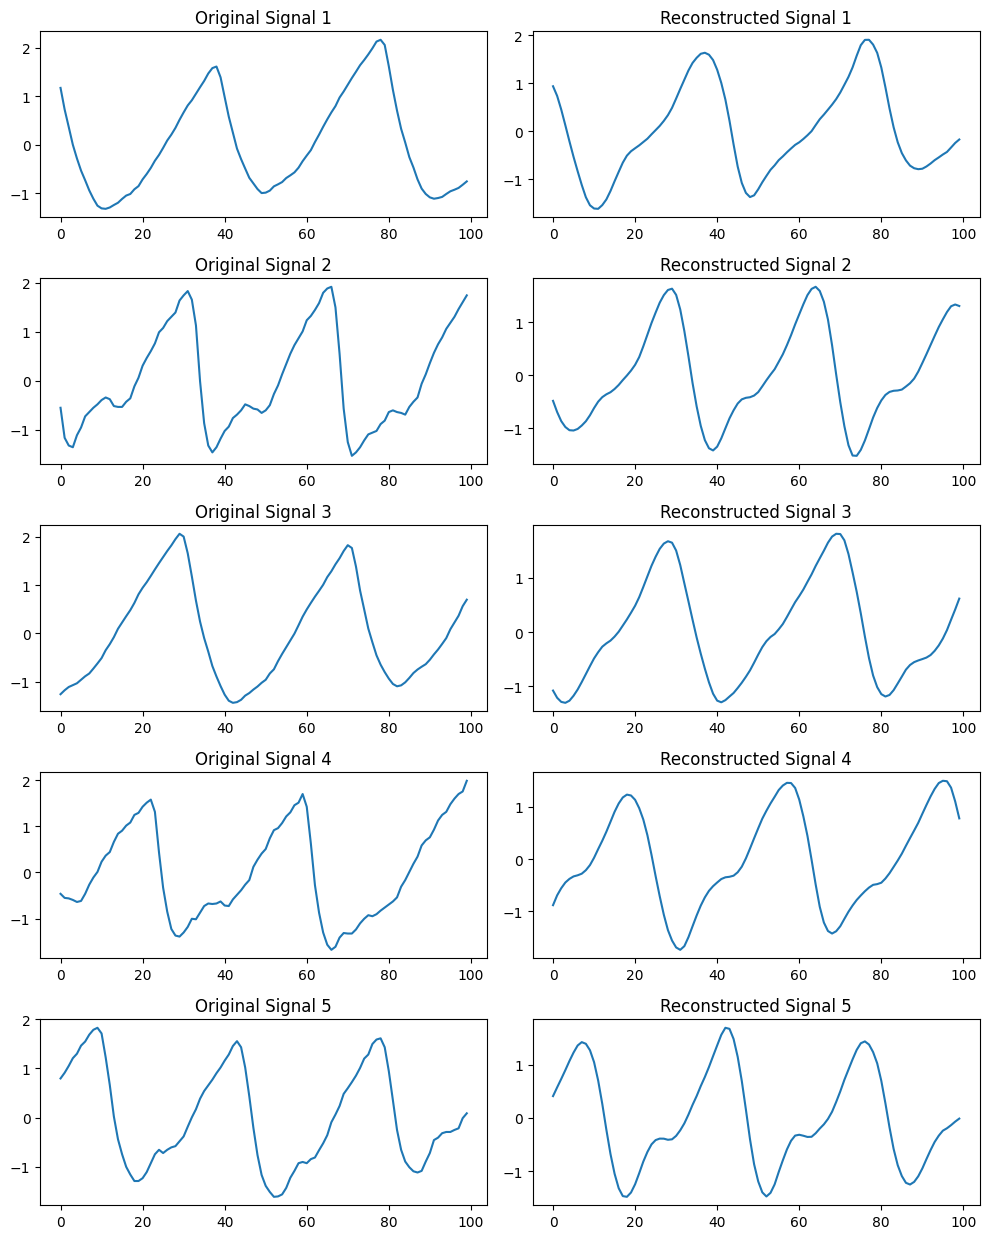

In [ ]:
import matplotlib.pyplot as plt

# Số lượng mẫu tín hiệu muốn vẽ
num_samples = 5

# Chọn các mẫu tín hiệu từ tập dữ liệu
test_data_samples = test_set[100:105]
reconstructed_signals_samples = autoencoder.predict(test_data_samples)

plt.figure(figsize=(10, num_samples * 2.5))

for i in range(num_samples):
    # Lấy tín hiệu gốc và tái cấu trúc
    original_signal = test_data_samples[i]
    reconstructed_signal = reconstructed_signals_samples[i]

    # Vẽ tín hiệu gốc
    plt.subplot(num_samples, 2, 2 * i + 1)
    plt.plot(original_signal)
    plt.title(f"Original Signal {i + 1}")

    # Vẽ tín hiệu tái cấu trúc
    plt.subplot(num_samples, 2, 2 * i + 2)
    plt.plot(reconstructed_signal)
    plt.title(f"Reconstructed Signal {i + 1}")

plt.tight_layout()
plt.show()


Classifier Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class Classifier(Model):
    def __init__(self, autoencoder):
        super(Classifier, self).__init__()
        self.autoencoder = autoencoder
        self.autoencoder.trainable = False

        # Trích xuất đặc trưng cho tín hiệu gốc
        self.conv_extractor_orig = tf.keras.Sequential([
            layers.Input(shape=(100, 1)),
            Dropout(0.01),
            layers.SeparableConv1D(filters=16, kernel_size=2, activation="relu6"),
            layers.GlobalAveragePooling1D()
        ])

        # Trích xuất đặc trưng cho tín hiệu tái cấu trúc
        self.conv_extractor_recon = tf.keras.Sequential([
            layers.Input(shape=(100, 1)),
            Dropout(0.01),
            layers.SeparableConv1D(filters=16, kernel_size=2, activation="relu6"),
            layers.GlobalAveragePooling1D()
        ])

        # Mạng phân loại
        self.classifier = tf.keras.Sequential([
            layers.Dense(24, activation="relu6"),
            Dropout(0.01),
            layers.Dense(12, activation="relu6"),
            layers.Dense(1, activation="tanh")
        ])

    def call(self, x):
        reconstructed = self.autoencoder(x)
        x_reshaped = tf.expand_dims(x, axis=-1)
        reconstructed_reshaped = tf.expand_dims(reconstructed, axis=-1)
        features_orig = self.conv_extractor_orig(x_reshaped)
        features_recon = self.conv_extractor_recon(reconstructed_reshaped)
        combined_features = tf.concat([features_orig, features_recon], axis=1)
        classification = self.classifier(combined_features)
        return classification

    def get_config(self):
        config = super(Classifier, self).get_config()
        config.update({
            "autoencoder": self.autoencoder
        })
        return config

    @classmethod
    def from_config(cls, config):
        autoencoder = config.pop('autoencoder')
        return cls(autoencoder, **config)

autoencoder.trainable = False
classifier = Classifier(autoencoder)

Load data

In [ ]:
X_TRAIN_PATH = "/content/drive/MyDrive/graduation_thesis/ppg-dataset/X_train.npy"
X_TEST_PATH = "/content/drive/MyDrive/graduation_thesis/ppg-dataset/X_test.npy"
Y_TRAIN_PATH = "/content/drive/MyDrive/graduation_thesis/ppg-dataset/y_train.npy"
Y_TEST_PATH = "/content/drive/MyDrive/graduation_thesis/ppg-dataset/y_test.npy"

In [ ]:
X_train = np.load(X_TRAIN_PATH)
X_test = np.load(X_TEST_PATH)
y_train = np.load(Y_TRAIN_PATH)
y_test = np.load(Y_TEST_PATH)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6300, 100)
(700, 100)
(6300,)
(700,)


Compile & Fit

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

classifier.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

history_classifier = classifier.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)


Epoch 1/500
197/197 [==============================] - 4s 8ms/step - loss: 0.8526 - mae: 0.8030 - val_loss: 0.8051 - val_mae: 0.7668
Epoch 2/500
197/197 [==============================] - 1s 6ms/step - loss: 0.6743 - mae: 0.6644 - val_loss: 0.5949 - val_mae: 0.6400
Epoch 3/500
197/197 [==============================] - 2s 8ms/step - loss: 0.5111 - mae: 0.5079 - val_loss: 0.4266 - val_mae: 0.4687
Epoch 4/500
197/197 [==============================] - 2s 10ms/step - loss: 0.3714 - mae: 0.3595 - val_loss: 0.3024 - val_mae: 0.2965
Epoch 5/500
197/197 [==============================] - 2s 10ms/step - loss: 0.3001 - mae: 0.2681 - val_loss: 0.2681 - val_mae: 0.2471
Epoch 6/500
197/197 [==============================] - 1s 7ms/step - loss: 0.2728 - mae: 0.2287 - val_loss: 0.2542 - val_mae: 0.2244
Epoch 7/500
197/197 [==============================] - 1s 6ms/step - loss: 0.2614 - mae: 0.2093 - val_loss: 0.2503 - val_mae: 0.2210
Epoch 8/500
197/197 [==============================] - 1s 6ms/step 

In [ ]:
classifier.summary()

Model: "classifier_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 autoencoder_1 (Autoencoder  multiple                  6824      
 )                                                               
                                                                 
 sequential_7 (Sequential)   (None, 16)                34        
                                                                 
 sequential_8 (Sequential)   (None, 16)                34        
                                                                 
 sequential_9 (Sequential)   (None, 1)                 1105      
                                                                 
Total params: 7997 (31.24 KB)
Trainable params: 1173 (4.58 KB)
Non-trainable params: 6824 (26.66 KB)
_________________________________________________________________


In [ ]:
classifier.autoencoder.summary()

Model: "autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 4)                 3364      
                                                                 
 sequential_6 (Sequential)   (None, 100)               3460      
                                                                 
Total params: 6824 (26.66 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 6824 (26.66 KB)
_________________________________________________________________


In [ ]:
classifier.conv_extractor_orig.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_7 (Dropout)         (None, 100, 1)            0         
                                                                 
 separable_conv1d_2 (Separa  (None, 99, 16)            34        
 bleConv1D)                                                      
                                                                 
 global_average_pooling1d_2  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.conv_extractor_recon.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 100, 1)            0         
                                                                 
 separable_conv1d_3 (Separa  (None, 99, 16)            34        
 bleConv1D)                                                      
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 24)                792       
                                                                 
 dropout_9 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 12)                300       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1105 (4.32 KB)
Trainable params: 1105 (4.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


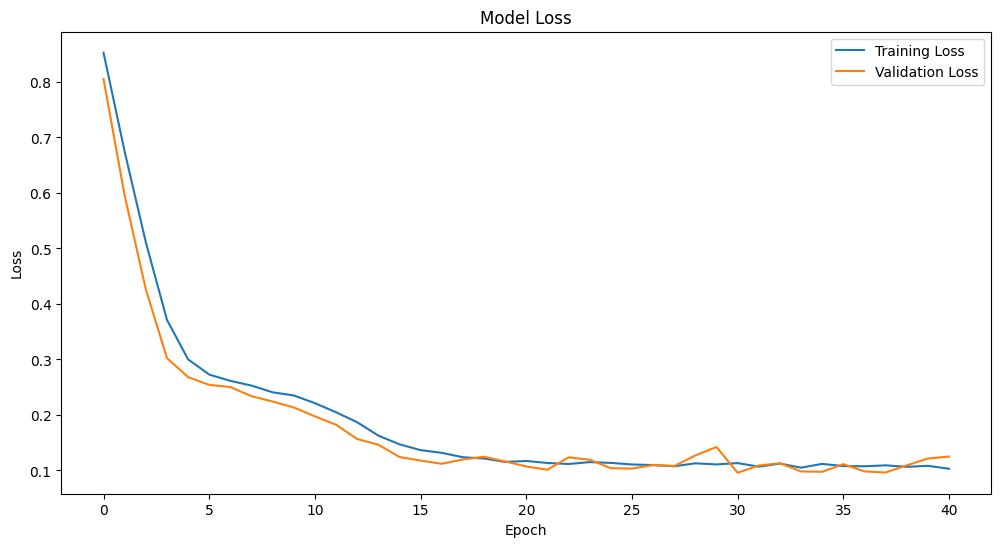

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_classifier.history['loss'], label='Training Loss')
plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

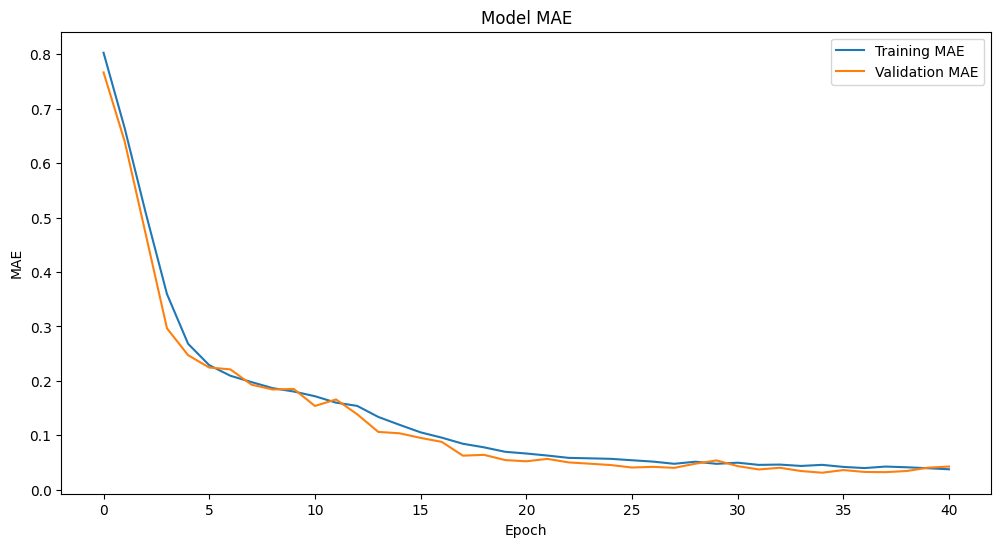

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_classifier.history['mae'], label='Training MAE')
plt.plot(history_classifier.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

Test Case

In [ ]:
y_pred = classifier.predict(X_test)

22/22 [==============================] - 0s 3ms/step


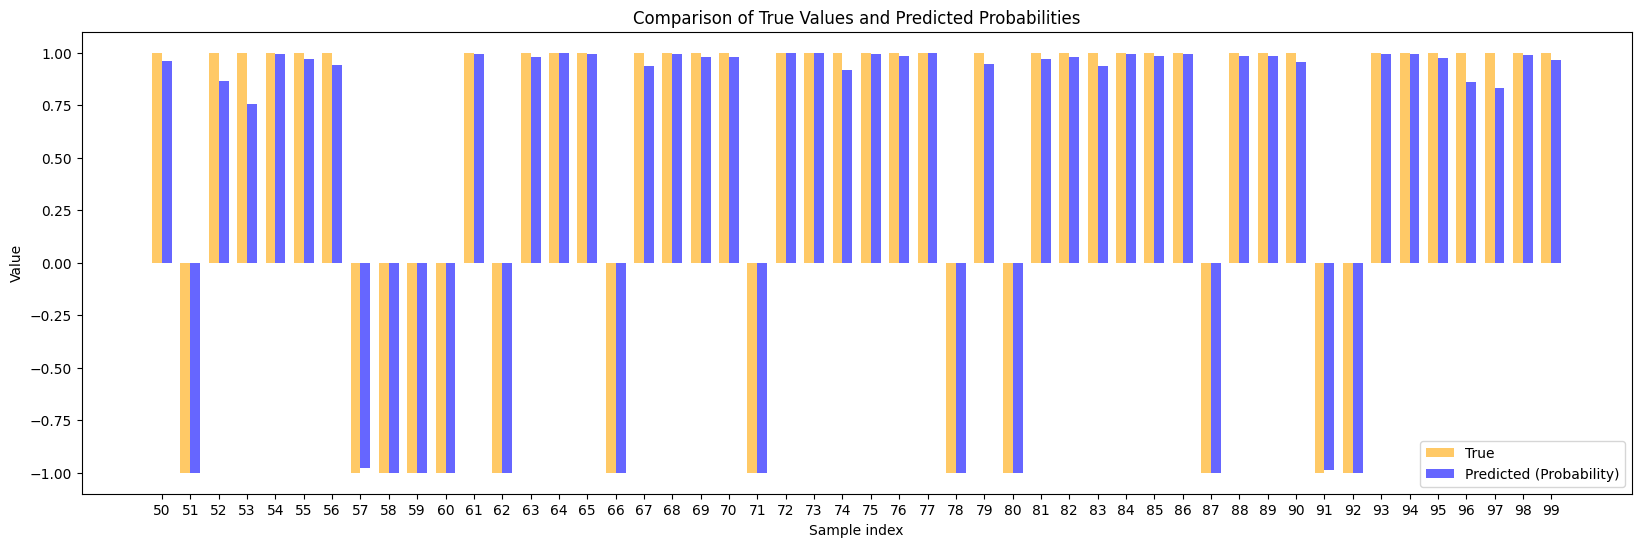

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Xác định phạm vi các mẫu muốn hiển thị
start_sample = 50  # Điểm bắt đầu
end_sample = 100  # Điểm kết thúc

# Kiểm tra tính hợp lệ của phạm vi
if end_sample > len(y_test):
    end_sample = len(y_test)

# Chọn các mẫu để hiển thị
indices = np.arange(start_sample, end_sample)

# Tạo biểu đồ cột
plt.figure(figsize=(20, 6))
bar_width = 0.35

# Vẽ cột cho giá trị thực
plt.bar(indices, y_test[start_sample:end_sample], bar_width, label='True', alpha=0.6, color='orange')

# Vẽ cột cho giá trị dự đoán (xác suất)
plt.bar(indices + bar_width, y_pred[start_sample:end_sample].flatten(), bar_width, label='Predicted (Probability)', alpha=0.6, color='blue')

# Thêm nhãn và tiêu đề
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('Comparison of True Values and Predicted Probabilities')
plt.xticks(indices + bar_width / 2, indices)
plt.legend()

# Hiển thị biểu đồ
plt.show()


Quantize model detect ppg

In [ ]:
import tensorflow as tf
import random
import numpy as np

# Lưu mô hình Keras
classifier.save('model.keras')

# Chuyển đổi mô hình Keras sang định dạng TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(classifier)

# Số lượng bước hiệu chuẩn
num_calibration_steps = 10

# Tối ưu hóa với lượng tử hóa
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Hàm tạo bộ dữ liệu đại diện
def representative_dataset_gen():
    num_samples = test_set.shape[0]

    for _ in range(num_calibration_steps):
        batch_size = min(10, num_samples)
        indices = random.sample(range(num_samples), batch_size)
        input_data = [test_set[indices].astype('float32')]
        yield input_data

converter.representative_dataset = representative_dataset_gen

# Đặt các phép toán được hỗ trợ và kiểu dữ liệu đầu vào/đầu ra
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32

# Chuyển đổi mô hình
tflite_quant_model = converter.convert()

# Lưu mô hình TFLite đã được lượng tử hóa
with open('detect_ppg_model.tflite', 'wb') as f:
    f.write(tflite_quant_model)


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
